<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-necessary-libraries" data-toc-modified-id="Import-necessary-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import necessary libraries</a></span></li><li><span><a href="#Load-the-dataset" data-toc-modified-id="Load-the-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the dataset</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Predictions</a></span></li></ul></div>

### Import necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model

### Load the dataset

In [2]:
mnsit_data = tf.keras.datasets.mnist

### Training 

In [3]:
#creating a simple model
(x_train, y_train), (x_test, y_test) = mnsit_data.load_data()

In [4]:
# dividing them to the range of (0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Add channel dimension for convolutional layer (reshape images)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1826 - accuracy: 0.9455 - val_loss: 0.0593 - val_accuracy: 0.9801
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0658 - accuracy: 0.9796 - val_loss: 0.0463 - val_accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0437 - accuracy: 0.9863 - val_loss: 0.0465 - val_accuracy: 0.9840
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0380 - val_accuracy: 0.9882
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0449 - val_accuracy: 0.9872


In [9]:
model.save("mnist_model.h5")

### Predictions

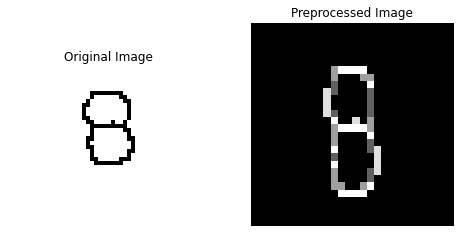

1/1 [==============================] - 0s 54ms/step
Predicted Digit: 8


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model("mnist_model.h5")

# Load the image
image = cv2.imread("handwritten_digit.png", cv2.IMREAD_GRAYSCALE)

# Resize the image to 28x28 (same size as MNIST images)
resized_image = cv2.resize(image, (28, 28))

# Invert the image (if necessary, depending on how you saved it)
inverted_image = cv2.bitwise_not(resized_image)

# Normalize pixel values to [0, 1]
normalized_image = inverted_image / 255.0

# Display the original and preprocessed images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')

plt.show()

# Reshape the image to match the model input shape and add batch dimension
input_image = normalized_image.reshape(1, 28, 28, 1)

# Perform prediction
prediction = model.predict(input_image)

# Get the predicted class (index of the highest probability)
predicted_class = np.argmax(prediction)

print("Predicted Digit:", predicted_class)
